# K-Nearest Neighbors
Grid Search será usado para selecionar os melhores hiperparâmetros.

In [1]:
import aux

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar os datasets
og_df, pca_df, pearson_df, lda_df = aux.get_datasets()

# Preparar listas para comparação
auc_values = []
f1_score_values = []

### Dataset Original

In [3]:
og_X_train, og_X_test, og_y_train, og_y_test = aux.prepare_dataset(og_df)

Buscando os melhores hiperparâmetros:

'algorithm' não foi usado pois o valor default já decide a melhor abordagem;

'leafsize' geralmente dá maior acurácia com valores menores, mas valores maiores são mais performáticos;

[Cross Validation](https://machinelearningmastery.com/k-fold-cross-validation/) é um método estatístico usado quando temos apenas um conjunto de dados para treinar nosso modelo. A ideia é previnir overfitting, e por isso nossos dados são divididos em diferentes conjuntos. Por sorte, é algo que ganhamos "de graça" ao fazer o GridSearch.

In [23]:
params = {
    'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 50, 100],
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, params, cv=2)
grid_search.fit(og_X_train, og_y_train)

print(grid_search.best_params_)

{'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}


In [4]:
knn = KNeighborsClassifier(n_neighbors=2, leaf_size=20, weights='distance')


knn.fit(og_X_train, og_y_train)
y_pred = knn.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7254, Falsos Não-Ataques: 16
Falsos Ataques: 2270, Verdadeiros Não-Ataques: 4965
AUC: 0.842
              precision    recall  f1-score   support

          -1       0.76      1.00      0.86      7270
           1       1.00      0.69      0.81      7235

    accuracy                           0.84     14505
   macro avg       0.88      0.84      0.84     14505
weighted avg       0.88      0.84      0.84     14505



### Dataset Reduzido por Pearson

In [5]:
pearson_X_train, pearson_X_test, pearson_y_train, pearson_y_test = aux.prepare_dataset(pearson_df)

In [5]:
params = {
    'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 50, 100],
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, params)
grid_search.fit(pearson_X_train, pearson_y_train)

print(grid_search.best_params_)

{'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}


In [6]:
knn = KNeighborsClassifier(leaf_size=20, n_neighbors=2, weights='distance')
knn.fit(pearson_X_train, pearson_y_train)
y_pred = knn.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7269, Falsos Não-Ataques: 1
Falsos Ataques: 211, Verdadeiros Não-Ataques: 7024
AUC: 0.985
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99      7270
           1       1.00      0.97      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por PCA

In [7]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = aux.prepare_dataset(pca_df)

In [ ]:
params = {
    'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 50, 100],
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, params)
grid_search.fit(pca_X_train, pca_y_train)

print(grid_search.best_params_)

{'leaf_size': 100, 'n_neighbors': 2, 'weights': 'distance'}


In [8]:
knn = KNeighborsClassifier(leaf_size=100, n_neighbors=2, weights='distance')
knn.fit(pca_X_train, pca_y_train)
y_pred = knn.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7251, Falsos Não-Ataques: 19
Falsos Ataques: 84, Verdadeiros Não-Ataques: 7151
AUC: 0.993
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      7270
         1.0       1.00      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido Por LDA

In [9]:
lda_X_train, lda_X_test, lda_y_train, lda_y_test = aux.prepare_dataset(lda_df)

In [16]:
params = {
    'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 50, 100],
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, params)
grid_search.fit(lda_X_train, lda_y_train)

print(grid_search.best_params_)

{'leaf_size': 100, 'n_neighbors': 4, 'weights': 'uniform'}


In [10]:
knn = KNeighborsClassifier(leaf_size= 100, n_neighbors=4, weights='uniform')
knn.fit(pca_X_train, pca_y_train)
y_pred = knn.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7262, Falsos Não-Ataques: 8
Falsos Ataques: 109, Verdadeiros Não-Ataques: 7126
AUC: 0.992
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      7270
         1.0       1.00      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Comparação dos Métodos

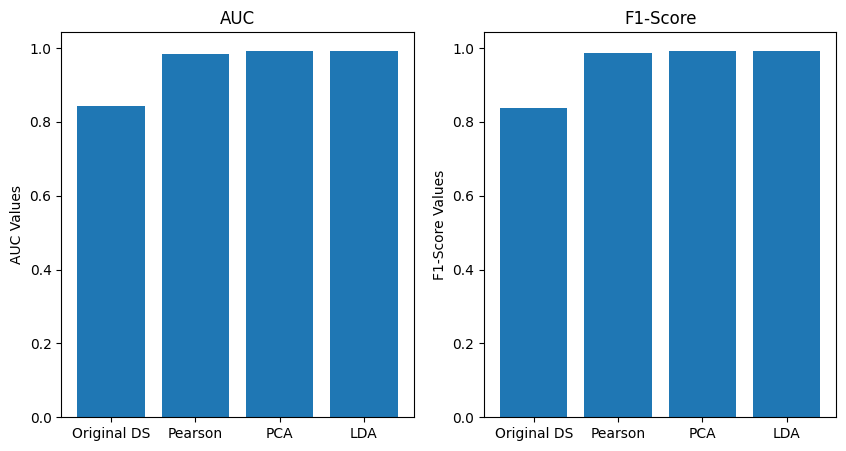

In [11]:
aux.plot_auc_and_f1(auc_values, f1_score_values)